# Testing SSA for the mechanistic model

In this notebook we show how to use the SSA for the activator to produce probability distributions and histograms.

## Usage

First let's import the mechanistic SSA.

In [1]:
include("./DSSA-Mech.jl"); using .SSAmechanistic;

Import some necessary packages for plotting and saving data.

In [2]:
using PyPlot, DelimitedFiles, LaTeXStrings;

Now, let's define:
- `par_set`: the set of parameter for which we want to simulate in order $\{a,a',b,b',\chi,c,d\}$ (note in paper we set $\chi=0$).
- `τ`: the deterministic delay time of the transition from nascent to mature RNA.
- `total_time`: the total time of the simulation.
- `sp`: the sampling period of the SSA (how often the state vector is stored). Total number of data points stored will be $=$`total_time/sp`.
- `sims`: the number of independent DSSA trajectories. If equal to 1 only a single DSSA trajectory will be produced.

The initial conditions of the SSA are to start in gene state $U^{**}$ with zero $N$ and $M$.

In [3]:
par_set = [0.1,0.1,80.1,4.1,0.0,10.1,1.0]; # params should be float64.
τ = 1.0; # must be float64.
total_time = 100000.0; # must be float64.
sp = 0.5; # must be float64.
sims = 1; # take a single trajectory. Must be integer.

In [4]:
# simulate
@time data=SSAmech(sims, par_set, τ, total_time, sp);

# take the individual trajectories of each species.
m_traj = data[4,1,:]; n_traj = data[3,1,:]; g_0 = 1 .- data[1,1,:].- data[2,1,:];
g_1 = data[2,1,:]; g_0 = data[1,1,:];

# save n and m traj to file
writedlm("SSAtest-bimod-N.csv",n_traj[1:end])
writedlm("SSAtest-bimod-M.csv",m_traj[1:end])

  2.886440 seconds (80.13 M allocations: 2.743 GiB, 11.83% gc time, 2.53% compilation time)


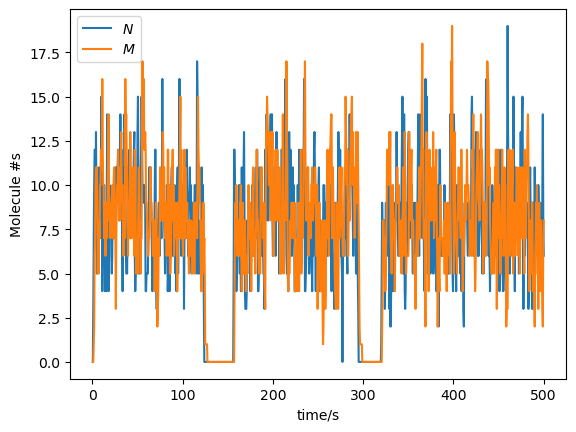

In [5]:
# plot first 1000 sample points
time = [sp*i for i in 1:1000];
PyPlot.plot(time,n_traj[1:1000], label = L"$N$");
PyPlot.plot(time,m_traj[1:1000], label = L"$M$");
PyPlot.legend(); PyPlot.xlabel("time/s"); PyPlot.ylabel("Molecule #s")
PyPlot.show()

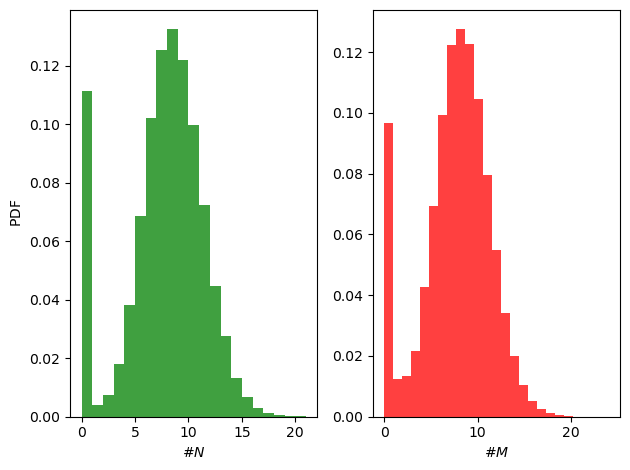

In [6]:
# plot historgram 
fig, axs = PyPlot.subplots(1, 2, sharey = false, tight_layout = true);
n_bins = floor(Int,maximum(n_traj)); m_bins = floor(Int,maximum(m_traj)); 
    axs[1].set_xlabel(L"\# N");axs[2].set_xlabel(L"\# M"); axs[1].set_ylabel(L"\mathrm{PDF}");
axs[1].hist(n_traj[floor(Int,total_time/(2*sp)):end], bins=n_bins, facecolor= "g", alpha=0.75, density=true);
axs[2].hist(m_traj[floor(Int,total_time/(2*sp)):end], bins=m_bins, facecolor= "r", alpha=0.75, density=true);